# **Setup**

In [ ]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

from collections import Counter
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, RFE, f_regression, f_classif
from scipy.stats import pearsonr


In [ ]:
#criar o vínculo com o drive onde está o dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Funções auxiliares para validação das predições para os segmentos
# coluna de range de idade
def age_range(age):
    if age >= 20 and age < 30:
        return "20 a 29"
    elif age >= 30 and age < 40:
        return "30 a 39"
    elif age >= 40 and age < 50:
        return "40 a 49"
    elif age >= 50:
        return "50+"
    else:
        return ""

# **Dataset e análises**

In [ ]:
# Carregamento do dataset de treino do modelo inicial
dataset = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset = dataset.loc[dataset['TEST'] == 0]
dataset = dataset.astype(float)
print(sorted(Counter(dataset.iloc[:, -2]).items()))

[(0.0, 45555), (1.0, 3329)]


**Códigos auxiliares de exploração do dataset**

In [ ]:
area = ['analytics', 'finance', 'HR', 'legal', 'operations', 'procurement', 'R_D', 'sales_marketing', 'rechnology']

for col in area:
  df = dataset.loc[dataset[col] == 1]
  contagem = df[col].sum()
  rate = round((contagem/(45555+3329))*100,1)
  print('coluna: {} - rate: {}'.format(col,rate))


coluna: analytics - rate: 9.6
coluna: finance - rate: 4.5
coluna: HR - rate: 4.3
coluna: legal - rate: 1.8
coluna: operations - rate: 21.2
coluna: procurement - rate: 13.2
coluna: R_D - rate: 1.8
coluna: sales_marketing - rate: 30.8
coluna: rechnology - rate: 12.9


In [ ]:
#analise de proporção das áreas
area = ['analytics', 'finance', 'HR', 'legal', 'operations', 'procurement', 'R_D', 'sales_marketing', 'rechnology']

for col in area:
  df = dataset.loc[dataset[col] == 1]
  contagem = df[col].sum()
  df_promoted = df.loc[df['is_promoted'] == 1]
  contagem_promoted = df_promoted[col].sum()
  rate = round((contagem_promoted/contagem)*100,1)
  print('coluna: {} - contagem: {} - contagem is_promoted: {} - rate: {}'.format(col, contagem,contagem_promoted,rate))


## **Análise de correlação de Pearson**

KPIs_met: 0.20, p-value: 0.0
awards_won: 0.19, p-value: 0.0
avg_training_score: 0.16, p-value: 0.0
previous_year_rating: 0.14, p-value: 0.0
region_4: 0.04, p-value: 0.0
region_22: 0.04, p-value: 0.0
master_s_above: 0.03, p-value: 0.0
rechnology: 0.02, p-value: 0.0
region_7: 0.02, p-value: 0.0
region_28: 0.02, p-value: 0.0
region_23: 0.02, p-value: 0.0
region_25: 0.02, p-value: 0.0
region_17: 0.01, p-value: 0.0
procurement: 0.01, p-value: 0.0
operations: 0.01, p-value: 0.0
analytics: 0.01, p-value: 0.0
region_3: 0.01, p-value: 0.1
region_1: 0.00, p-value: 0.3
region_8: 0.00, p-value: 0.4
region_30: 0.00, p-value: 0.9
finance: 0.00, p-value: 0.9
below_secondary: -0.00, p-value: 0.8
region_13: -0.00, p-value: 0.5
region_10: -0.00, p-value: 0.4
region_27: -0.00, p-value: 0.4
region_15: -0.00, p-value: 0.3
region_14: -0.01, p-value: 0.2
region_18: -0.01, p-value: 0.2
region_16: -0.01, p-value: 0.1
region_12: -0.01, p-value: 0.1
R_D: -0.01, p-value: 0.0
region_2: -0.01, p-value: 0.0
region_2

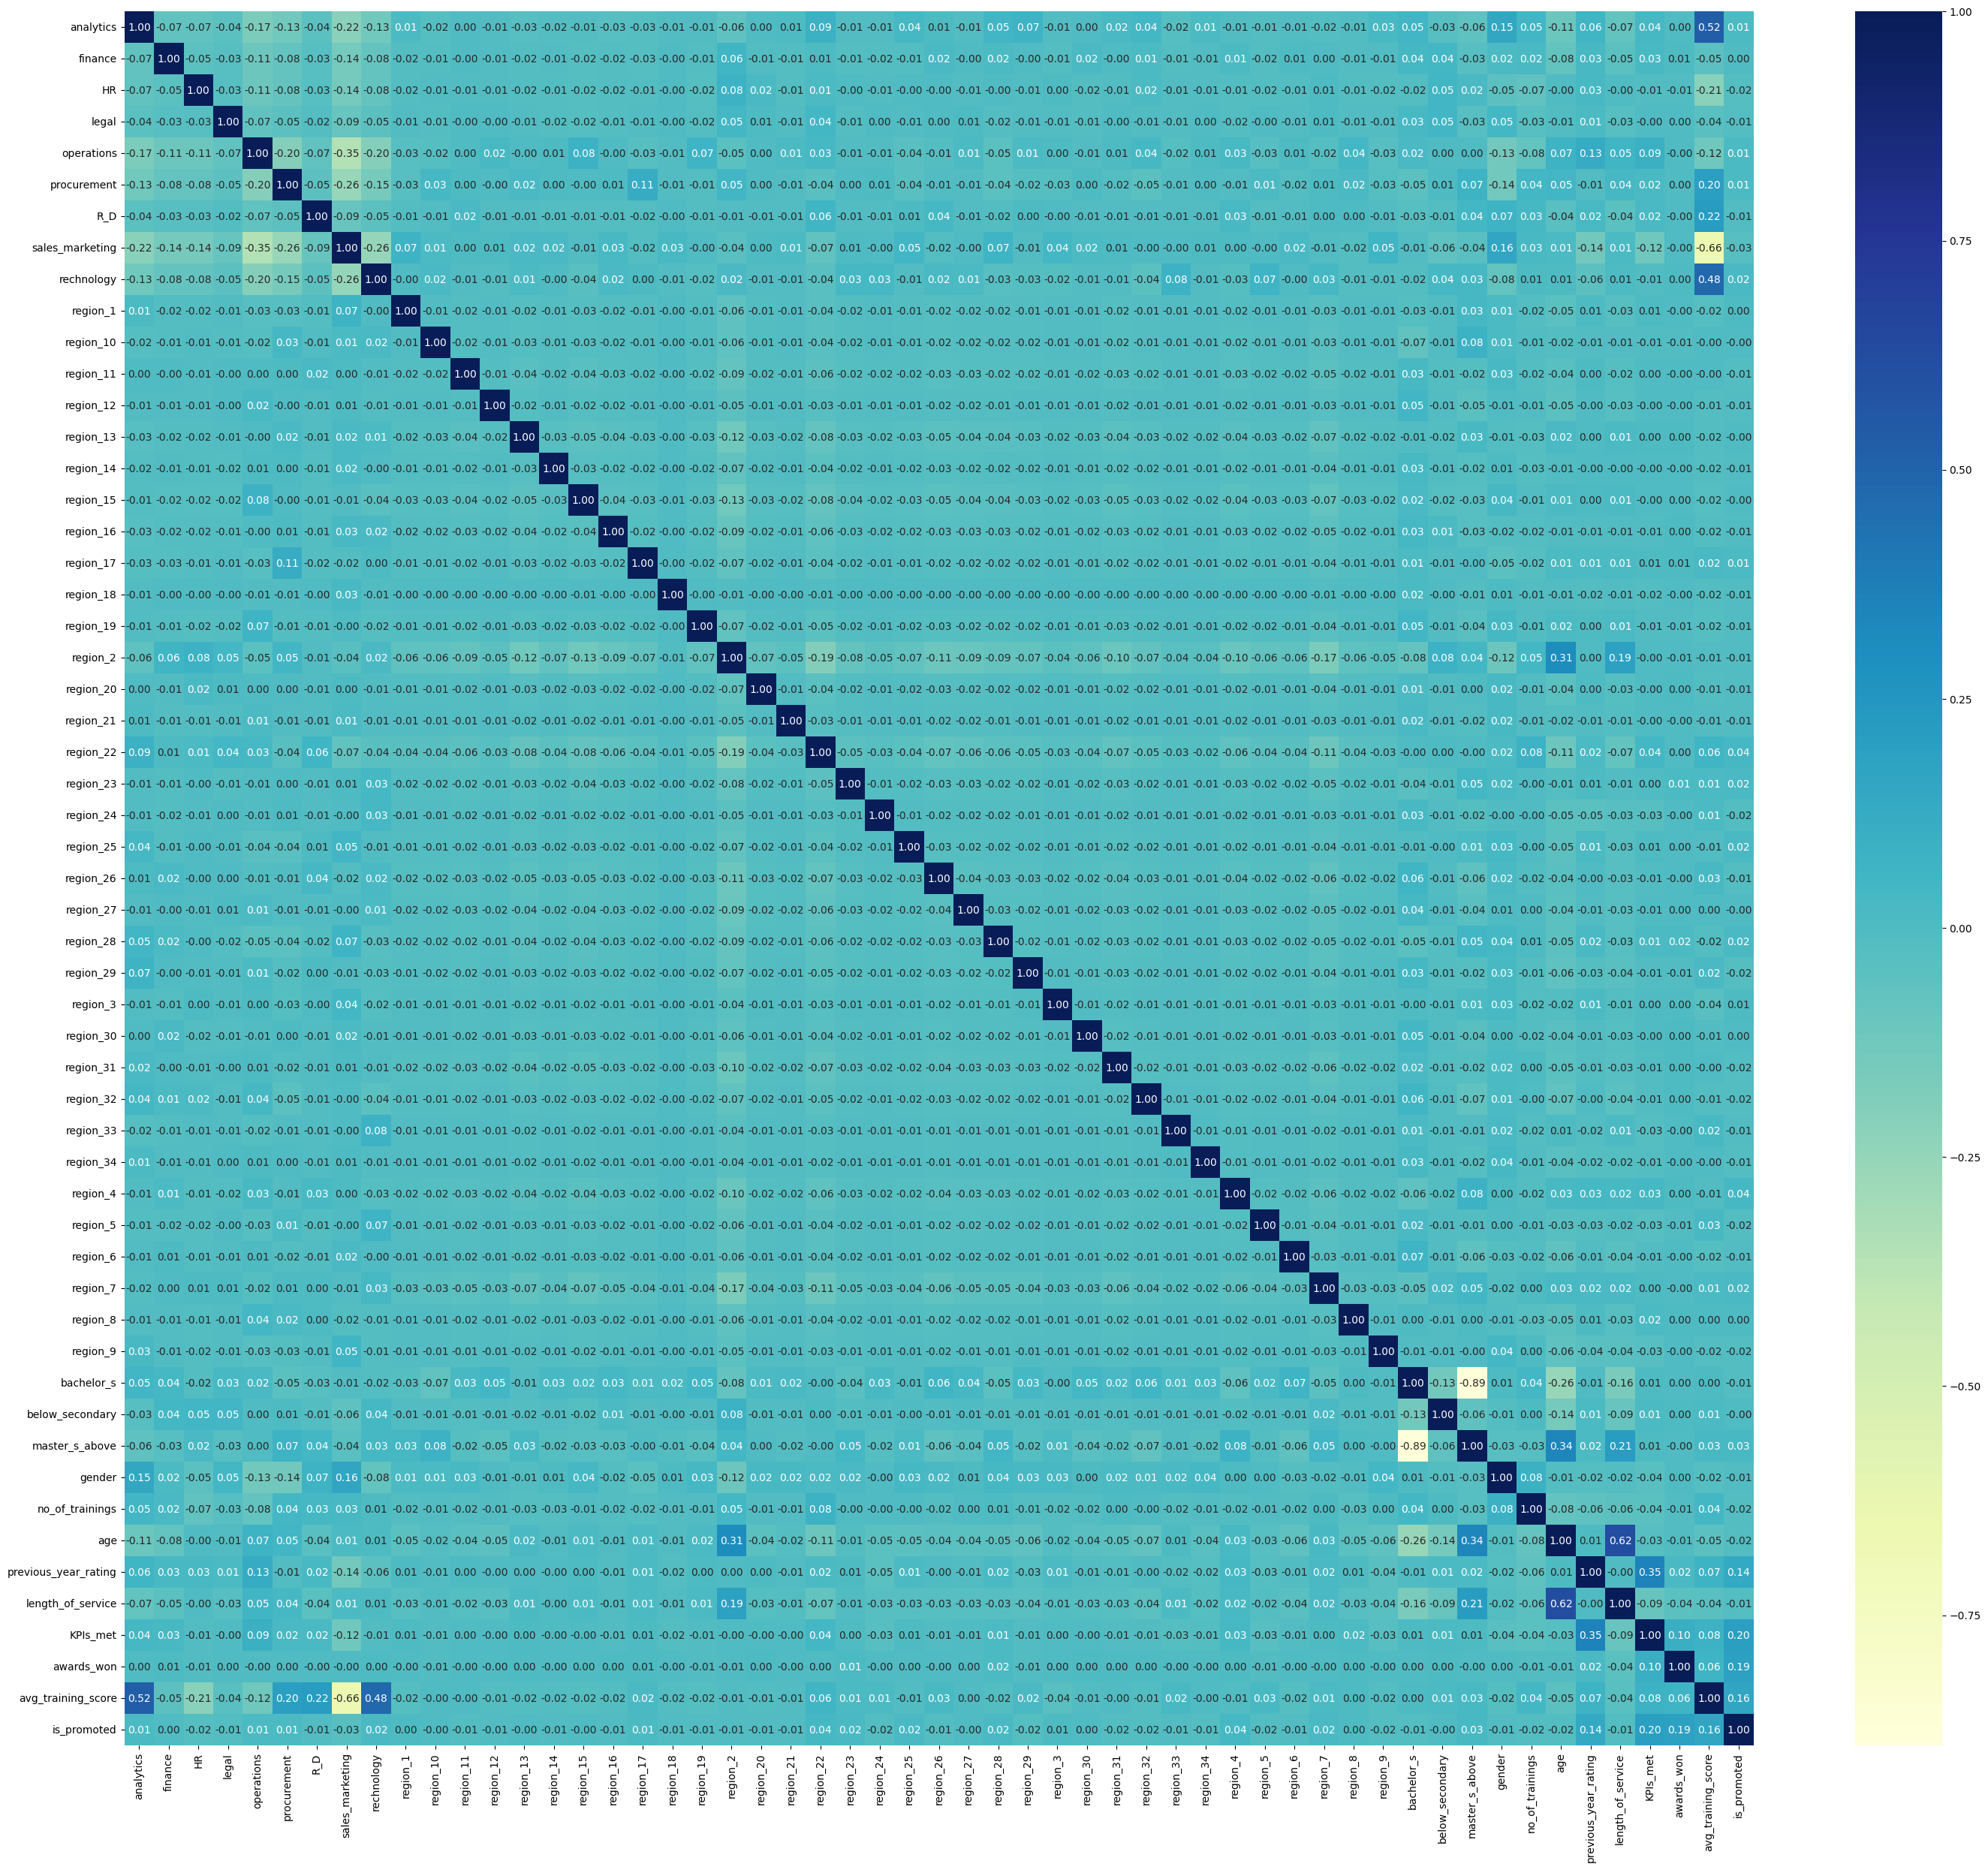

In [ ]:
# Análise de correlação das variáveis

# Definição das variáveis target e features
features = dataset.columns.tolist()
features = features[:-2]
target = 'is_promoted'

# Cálculo dos coeficientes de correlação
correlation_coefficients = []
for feature in features:
    correlation_coefficient, p_value = pearsonr(dataset[feature], dataset[target])
    correlation_coefficients.append((feature, correlation_coefficient, p_value))

correlation_coefficients.sort(key=lambda x: x[1], reverse=True)

for feature, correlation_coefficient, p_value in correlation_coefficients:
    print(f'{feature}: {correlation_coefficient:.2f}, p-value: {p_value:.1f}')

df = pd.DataFrame(correlation_coefficients, columns=['Feature', 'Correlation Coefficient', 'P-value'])

# Export the DataFrame to Excel.
df.to_excel('coef_correl.xlsx', index=False)

#matriz de correlação entre as variáveis
dataset_corr = dataset.drop('TEST', axis = 1)
plt, axes = plt.subplots(figsize=(35, 30))
dataplot = sns.heatmap(dataset_corr.corr(),cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()
plt.savefig("my_corr_matrix.pdf")

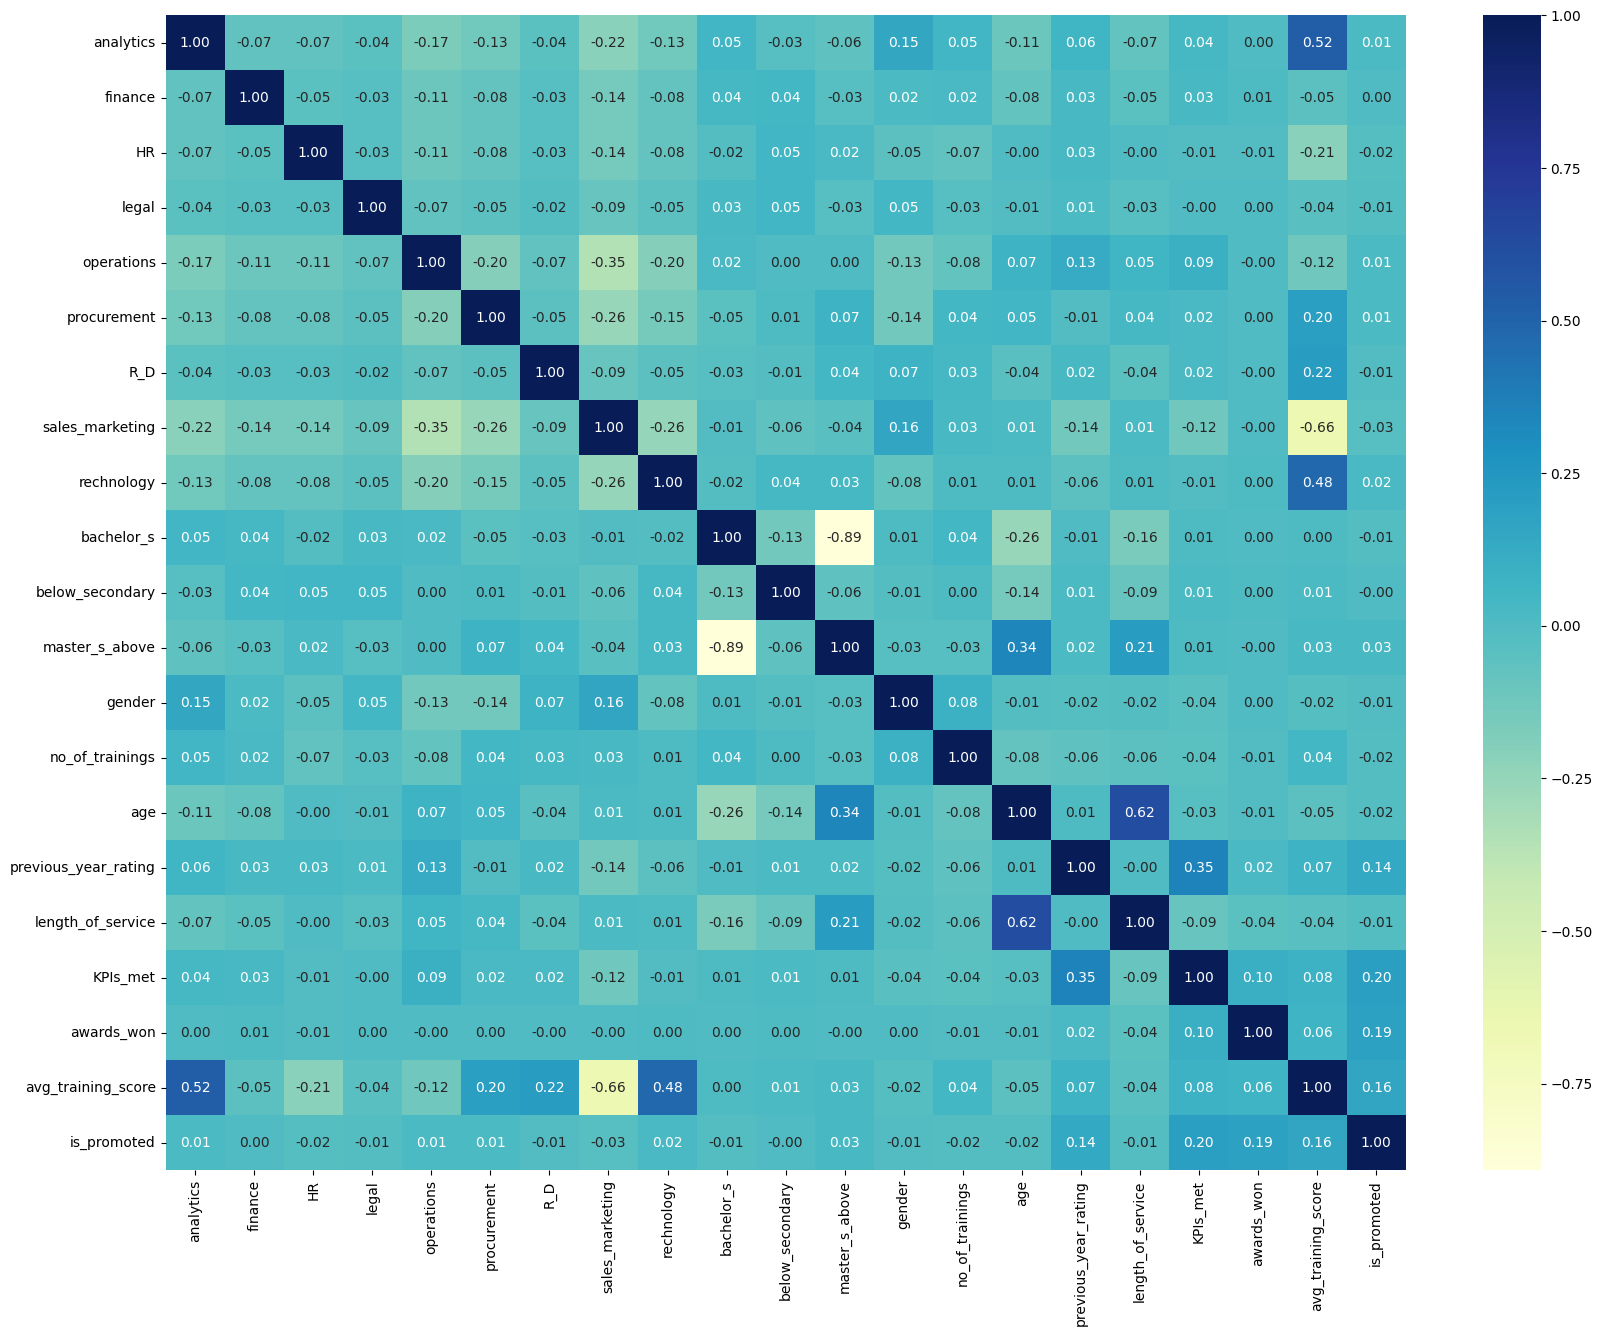

In [ ]:
#matriz de correlação reduzida
dataset_corr = dataset.drop(['region_34','region_1', 'region_2', 	'region_3', 	'region_4', 	'region_5', 	'region_6', 	'region_7', 	'region_8', 	'region_9', 	'region_10', 	'region_11', 	'region_12', 	'region_13', 	'region_14', 	'region_15', 	'region_16', 	'region_17', 	'region_18', 	'region_19', 	'region_20', 	'region_21', 	'region_22', 	'region_23', 	'region_24', 	'region_25', 	'region_26', 	'region_27', 	'region_28', 	'region_29', 	'region_30', 	'region_31', 	'region_32', 	'region_33',
'TEST'], axis = 1)
plt, axes = plt.subplots(figsize=(20, 15))
dataplot = sns.heatmap(dataset_corr.corr(),cmap="YlGnBu", annot=True, fmt=".2f")
plt.show()
plt.savefig("my_corr_matrix_reduce.pdf")
#plt.savefig("my_corr_matrix_reduce.pdf")


**Análise de correlação**

as variáveis de região não tem correlação forte entre si e nem com outras variáveis, por isso vou fazer uma matriz de correlação sem elas para melhor entendimento.
nenhum variável independente tem correlação forte com a dependente: indicativo que tem muito ruido
gender não tem forte correlaçao com nenhuma variável
a correlação mais forte que age tem é lenght of service (o que faz sentido), mas lenght não tem correlação com is_promoted
avg_training_score tem correlação forte e inversa com sales_marketing, mas avg_training_score não tem correlação com is_promoted

# **Feature Selection**


**Recursive feature elimination (RFE)**

In [ ]:
estimator = svm
Y = dataset.iloc[:, -2]
X = dataset.iloc[:,:-2]

selector = RFE(estimator, n_features_to_select=30, step=1)
selector = selector.fit(X, Y)

feature_names = X.columns
feature_names_selected = [feature_name for feature_name, support in zip(feature_names, selector.get_support()) if support]
print(feature_names_selected)


['analytics', 'finance', 'HR', 'legal', 'operations', 'procurement', 'R_D', 'sales_marketing', 'rechnology', 'region_11', 'region_12', 'region_17', 'region_21', 'region_22', 'region_24', 'region_25', 'region_29', 'region_3', 'region_32', 'region_34', 'region_4', 'region_5', 'region_6', 'region_9', 'bachelor_s', 'below_secondary', 'master_s_above', 'KPIs_met', 'awards_won', 'avg_training_score']


# **Modelo geral treinado com todas as variáveis**

In [ ]:
#modelo criado para todas as variáveis
# SVM

# Algorithm
ls_coef = []
ls_cm   = []
ls_acc  = []
samples = 250
models  = 100
svm     = SVC(C = 0.5, kernel = 'linear', gamma = 'auto')

for i in range(0, models):
    if (samples == 0):
        class_1 = dataset.loc[dataset['is_promoted'] == 1]
    else:
        class_1 = dataset.loc[dataset['is_promoted'] == 1].sample(n = samples, random_state = i)
    class_0 = dataset.loc[dataset['is_promoted'] == 0].sample(n=class_1.shape[0], random_state = i)
    data    = pd.concat([class_1, class_0])
    X       = data.iloc[:,:-2]
    y       = data.iloc[:, -2]
    svm.fit(X, y)
    svm_pred_y = svm.predict(X)
    cm_svm     = confusion_matrix(svm_pred_y, y)
    acc_svm    = round(accuracy_score(svm_pred_y, y), 3)
    b          = svm.intercept_
    w          = svm.coef_
    ls_cm.append(cm_svm)
    ls_acc.append(acc_svm)
    ls_coef.append([b, w])
   #print('iteration = ', str(i+1))


In [ ]:
# SVM

# Validation
dataset_x = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset_x = dataset_x.loc[dataset_x['TEST'] == 1]
dataset_x = dataset_x.astype(float)
dataset_y = dataset_x.iloc[:, -2]
dataset_x = dataset_x.iloc[:,:-2]
print(sorted(Counter(dataset_y).items()))

for i in range(0, len(ls_coef)):
    if (i == 0):
        prediction_models = np.dot(dataset_x, ls_coef[0][1].T) + ls_coef[0][0][0]
        prediction_models = np.sum(prediction_models, axis = 1)
        prediction_models = np.where(prediction_models > 0.0, 1, 0)
    else:
        prediction = np.dot(dataset_x, ls_coef[i][1].T) + ls_coef[i][0][0]
        prediction = np.sum(prediction, axis = 1)
        prediction = np.where(prediction > 0.0, 1, 0)
        prediction_models = np.vstack((prediction_models, prediction.T))

svm_pred_y = np.sum(prediction_models.T, axis = 1)
svm_pred_y = np.where(svm_pred_y > len(ls_coef)/2, 1, 0)
print(sorted(Counter(svm_pred_y).items()))

cm_svm = confusion_matrix(svm_pred_y, dataset_y)
cm_svm
acc_svm = round(accuracy_score(svm_pred_y, dataset_y), 3)
acc_svm
print(classification_report(svm_pred_y, dataset_y))

auc_svm = roc_auc_score(svm_pred_y, dataset_y)
auc_svm
fpr, tpr, thresholds = roc_curve(svm_pred_y, dataset_y)
#plot_roc_curve(fpr, tpr)


[(0.0, 800), (1.0, 1000)]
[(0, 659), (1, 1141)]
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       659
           1       0.90      0.79      0.84      1141

    accuracy                           0.81      1800
   macro avg       0.80      0.82      0.81      1800
weighted avg       0.83      0.81      0.82      1800



**Importância das variáveis**

In [ ]:
importance = svm.pvalues_[0]

AttributeError: ignored

In [ ]:
# Cálculo da importancia de cada variável
importance = svm.coef_[0]

# Cálculo da noma L1 dos coeficientes
l1_norm = np.linalg.norm(importance, ord=1)

normalized_importance = importance / l1_norm

normalized_importance = sorted(normalized_importance, reverse=True)

# Print das importancias
for i in range(54):
  print('Feature {}: {} ({:.2f}) ({:.2f})'.format(i + 1, dataset.columns[i], normalized_importance[i], importance[i]))

data = []
for i in range(len(feature_names)):
  data.append((dataset.columns[i], normalized_importance[i], importance[i]))

df_coef = pd.DataFrame(data, columns=["Feature", "Normalized Importance", "Importance"])

# Export the DataFrame to Excel.
df_coef.to_excel('coef_.xlsx', index=False)


Feature 1: analytics (0.08) (-1.99)
Feature 2: finance (0.07) (0.30)
Feature 3: HR (0.06) (1.31)
Feature 4: legal (0.05) (0.58)
Feature 5: operations (0.03) (0.74)
Feature 6: procurement (0.03) (-0.25)
Feature 7: R_D (0.03) (-1.50)
Feature 8: sales_marketing (0.03) (1.82)
Feature 9: rechnology (0.02) (-1.01)
Feature 10: region_1 (0.02) (-0.14)
Feature 11: region_10 (0.02) (0.28)
Feature 12: region_11 (0.02) (0.79)
Feature 13: region_12 (0.01) (0.00)
Feature 14: region_13 (0.01) (-0.04)
Feature 15: region_14 (0.01) (-0.03)
Feature 16: region_15 (0.01) (0.13)
Feature 17: region_16 (0.01) (-0.06)
Feature 18: region_17 (0.01) (0.00)
Feature 19: region_18 (0.01) (0.00)
Feature 20: region_19 (0.01) (0.31)
Feature 21: region_2 (0.01) (0.12)
Feature 22: region_20 (0.00) (-0.43)
Feature 23: region_21 (0.00) (-1.44)
Feature 24: region_22 (0.00) (0.00)
Feature 25: region_23 (0.00) (0.07)
Feature 26: region_24 (0.00) (0.00)
Feature 27: region_25 (0.00) (0.64)
Feature 28: region_26 (0.00) (-0.45)
F

**Verificação das predições por segmento segmento**

In [ ]:
#construindo o dataset de verificação das métricas

#dataset
dataset = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset = dataset.loc[dataset['TEST'] == 1]
dataset = dataset.astype(float)
dataset = dataset.iloc[:,:-1]
dataset['prediction'] = svm_pred_y
dataset['age_range'] = dataset['age'].apply(age_range)

#calculo das métricas por range de idade
age_range_array = sorted(dataset['age_range'].unique())

for age_range in age_range_array:
  df = dataset.loc[dataset['age_range'] == age_range]
  acc_svm = round(accuracy_score(df['prediction'], df['is_promoted']), 3)
  print('Range_age: {} - Accuracy Score: {}'.format(age_range, acc_svm))
  print(classification_report(df['prediction'], df['is_promoted']))

#calculo das métricas por gender
gender_array = [0,1]

for gender in gender_array:
  df = dataset.loc[dataset['gender'] == gender]
  acc_svm = round(accuracy_score(df['prediction'], df['is_promoted']), 3)
  print('Gender: {} - Accuracy Score: {}'.format(gender, acc_svm))
  print(classification_report(df['prediction'], df['is_promoted']))


Range_age: 20 a 29 - Accuracy Score: 0.818
              precision    recall  f1-score   support

           0       0.73      0.83      0.78       148
           1       0.89      0.81      0.85       242

    accuracy                           0.82       390
   macro avg       0.81      0.82      0.81       390
weighted avg       0.83      0.82      0.82       390

Range_age: 30 a 39 - Accuracy Score: 0.811
              precision    recall  f1-score   support

           0       0.69      0.85      0.76       345
           1       0.91      0.79      0.84       643

    accuracy                           0.81       988
   macro avg       0.80      0.82      0.80       988
weighted avg       0.83      0.81      0.81       988

Range_age: 40 a 49 - Accuracy Score: 0.823
              precision    recall  f1-score   support

           0       0.71      0.90      0.79       124
           1       0.92      0.78      0.84       203

    accuracy                           0.82       327

# **Modelo treinado sem Age, gender e outras variáveis sem importância*

As análises sobre a correlação,importância das variáveis de área com modelo e seleção de features apontou para retirada dessas variáveis e modelo foi treinado sem elas para avaliar o desempenho.

In [ ]:
# Loading Dataset
dataset1 = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset1 = dataset1.loc[dataset1['TEST'] == 0]
dataset1 = dataset1.astype(float)
print(sorted(Counter(dataset1.iloc[:, -2]).items()))

[(0.0, 45555), (1.0, 3329)]


In [ ]:
#Ajustar pra estar só com as variáveis importantes.
# SVM

# Algorithm
ls_coef = []
ls_cm   = []
ls_acc  = []
samples = 250
models  = 100
svm     = SVC(C = 0.5, kernel = 'linear', gamma = 'auto')

for i in range(0, models):
    if (samples == 0):
        class_1 = dataset1.loc[dataset1['is_promoted'] == 1]
    else:
        class_1 = dataset1.loc[dataset1['is_promoted'] == 1].sample(n = samples, random_state = i)
    class_0 = dataset1.loc[dataset1['is_promoted'] == 0].sample(n=class_1.shape[0], random_state = i)
    data    = pd.concat([class_1, class_0])
    X       = data.iloc[:,:-2]
    X       = X.drop(['region_1', 'region_10', 'region_13', 'region_14', 'region_15',
                      'region_16', 'region_18', 'region_19', 'region_2', 'region_20',
                      'region_23', 'region_26', 'region_27', 'region_28', 'region_30',
                      'region_31', 'region_33', 'region_7', 'region_8', 'gender',
                      'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service','is_promoted'], axis=1)
    y       = data.iloc[:, -2]
    svm.fit(X, y)
    svm_pred_y = svm.predict(X)
    cm_svm     = confusion_matrix(svm_pred_y, y)
    acc_svm    = round(accuracy_score(svm_pred_y, y), 3)
    b          = svm.intercept_
    w          = svm.coef_
    ls_cm.append(cm_svm)
    ls_acc.append(acc_svm)
    ls_coef.append([b, w])
    #print('iteration = ', str(i+1))


**Validação métricas desempenho**

In [ ]:
# SVM_2
# Validation
dataset1_x = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset1_x = dataset1_x.loc[dataset1_x['TEST'] == 1]
dataset1_x = dataset1_x.astype(float)
dataset1_y = dataset1_x.iloc[:, -2]
dataset1_x = dataset1_x.iloc[:,:-2]
dataset1_x = dataset1_x.drop(['region_1', 'region_10', 'region_13', 'region_14', 'region_15',
                      'region_16', 'region_18', 'region_19', 'region_2', 'region_20',
                      'region_23', 'region_26', 'region_27', 'region_28', 'region_30',
                      'region_31', 'region_33', 'region_7', 'region_8', 'gender',
                      'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service'], axis = 1)
print(sorted(Counter(dataset1_y).items()))

for i in range(0, len(ls_coef)):
    if (i == 0):
        prediction_models = np.dot(dataset1_x, ls_coef[0][1].T) + ls_coef[0][0][0]
        prediction_models = np.sum(prediction_models, axis = 1)
        prediction_models = np.where(prediction_models > 0.0, 1, 0)
    else:
        prediction = np.dot(dataset1_x, ls_coef[i][1].T) + ls_coef[i][0][0]
        prediction = np.sum(prediction, axis = 1)
        prediction = np.where(prediction > 0.0, 1, 0)
        prediction_models = np.vstack((prediction_models, prediction.T))

svm_pred_y = np.sum(prediction_models.T, axis = 1)
svm_pred_y = np.where(svm_pred_y > len(ls_coef)/2, 1, 0)
print(sorted(Counter(svm_pred_y).items()))

cm_svm = confusion_matrix(svm_pred_y, dataset1_y)
acc_svm = round(accuracy_score(svm_pred_y, dataset1_y), 3)
acc_svm
print(classification_report(svm_pred_y, dataset1_y))

auc_svm = roc_auc_score(svm_pred_y, dataset1_y)
auc_svm
print(cm_svm)

[(0.0, 800), (1.0, 1000)]
[(0, 669), (1, 1131)]
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       669
           1       0.89      0.79      0.84      1131

    accuracy                           0.81      1800
   macro avg       0.80      0.81      0.80      1800
weighted avg       0.82      0.81      0.81      1800

[[561 108]
 [239 892]]


**Validação das métricas de desempenho por segmento**

In [ ]:
#construindo o dataset de verificação das métricas

#dataset
dataset = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset = dataset.loc[dataset['TEST'] == 1]
dataset = dataset.astype(float)
dataset = dataset.iloc[:,:-1]
dataset['prediction'] = svm_pred_y
dataset['age_range'] = dataset['age'].apply(age_range)

#calculo das métricas por range de idade
age_range_array = sorted(dataset['age_range'].unique())

for age_range in age_range_array:
  df = dataset.loc[dataset['age_range'] == age_range]
  acc_svm = round(accuracy_score(df['prediction'], df['is_promoted']), 3)
  print('Range_age: {} - Accuracy Score: {}'.format(age_range, acc_svm))
  print(classification_report(df['prediction'], df['is_promoted']))

#calculo das métricas por gender
gender_array = [0,1]

for gender in gender_array:
  df = dataset.loc[dataset['gender'] == gender]
  acc_svm = round(accuracy_score(df['prediction'], df['is_promoted']), 3)
  print('Gender: {} - Accuracy Score: {}'.format(gender, acc_svm))
  print(classification_report(df['prediction'], df['is_promoted']))

Range_age: 20 a 29 - Accuracy Score: 0.803
              precision    recall  f1-score   support

           0       0.73      0.80      0.76       154
           1       0.86      0.81      0.83       236

    accuracy                           0.80       390
   macro avg       0.79      0.80      0.80       390
weighted avg       0.81      0.80      0.80       390

Range_age: 30 a 39 - Accuracy Score: 0.802
              precision    recall  f1-score   support

           0       0.68      0.83      0.75       352
           1       0.89      0.79      0.84       636

    accuracy                           0.80       988
   macro avg       0.79      0.81      0.79       988
weighted avg       0.82      0.80      0.80       988

Range_age: 40 a 49 - Accuracy Score: 0.838
              precision    recall  f1-score   support

           0       0.73      0.91      0.81       125
           1       0.94      0.79      0.86       202

    accuracy                           0.84       327

# **Modelo treinado somente com as variáveis de desempenho**

In [ ]:
# Loading Dataset
dataset2 = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset2 = dataset2.loc[dataset2['TEST'] == 0]
dataset2 = dataset2.astype(float)
print(sorted(Counter(dataset2.iloc[:, -2]).items()))

[(0.0, 45555), (1.0, 3329)]


In [ ]:
# SVM_2

# Algorithm
ls_coef = []
ls_cm   = []
ls_acc  = []
samples = 250
models  = 100
svm     = SVC(C = 0.5, kernel = 'linear', gamma = 'auto')

for i in range(0, models):
    if (samples == 0):
        class_1 = dataset2.loc[dataset2['is_promoted'] == 1]
    else:
        class_1 = dataset2.loc[dataset2['is_promoted'] == 1].sample(n = samples, random_state = i)
    class_0 = dataset2.loc[dataset2['is_promoted'] == 0].sample(n=class_1.shape[0], random_state = i)
    data    = pd.concat([class_1, class_0])
    X       = data.iloc[:,:-2]
    X       = X.drop(['analytics', 'finance', 'HR', 'legal', 'operations', 'procurement',
                      'R_D', 'sales_marketing', 'rechnology', 'region_1', 'region_10',
                      'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
                      'region_16', 'region_17', 'region_18', 'region_19', 'region_2',
                      'region_20', 'region_21', 'region_22', 'region_23', 'region_24',
                      'region_25', 'region_26', 'region_27', 'region_28', 'region_29',
                      'region_3', 'region_30', 'region_31', 'region_32', 'region_33',
                      'region_34', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
                      'region_9','gender','age'], axis=1)
    y       = data.iloc[:, -2]
    svm.fit(X, y)
    svm_pred_y = svm.predict(X)
    cm_svm     = confusion_matrix(svm_pred_y, y)
    acc_svm    = round(accuracy_score(svm_pred_y, y), 3)
    b          = svm.intercept_
    w          = svm.coef_
    ls_cm.append(cm_svm)
    ls_acc.append(acc_svm)
    ls_coef.append([b, w])


In [ ]:
# SVM

# Validation
dataset2_x = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset2_x = dataset2_x.loc[dataset2_x['TEST'] == 1]
dataset2_x = dataset2_x.astype(float)
dataset2_y = dataset2_x.iloc[:, -2]
dataset2_x = dataset2_x.iloc[:,:-2]
dataset2_x = dataset2_x.drop(['analytics', 'finance', 'HR', 'legal', 'operations', 'procurement',
                              'R_D', 'sales_marketing', 'rechnology', 'region_1', 'region_10',
                              'region_11', 'region_12', 'region_13', 'region_14', 'region_15',
                              'region_16', 'region_17', 'region_18', 'region_19', 'region_2',
                              'region_20', 'region_21', 'region_22', 'region_23', 'region_24',
                              'region_25', 'region_26', 'region_27', 'region_28', 'region_29',
                              'region_3', 'region_30', 'region_31', 'region_32', 'region_33',
                              'region_34', 'region_4', 'region_5', 'region_6', 'region_7', 'region_8',
                              'region_9','gender','age'], axis=1)
print(sorted(Counter(dataset2_y).items()))

for i in range(0, len(ls_coef)):
    if (i == 0):
        prediction_models = np.dot(dataset2_x, ls_coef[0][1].T) + ls_coef[0][0][0]
        prediction_models = np.sum(prediction_models, axis = 1)
        prediction_models = np.where(prediction_models > 0.0, 1, 0)
    else:
        prediction = np.dot(dataset2_x, ls_coef[i][1].T) + ls_coef[i][0][0]
        prediction = np.sum(prediction, axis = 1)
        prediction = np.where(prediction > 0.0, 1, 0)
        prediction_models = np.vstack((prediction_models, prediction.T))

svm_pred_y = np.sum(prediction_models.T, axis = 1)
svm_pred_y = np.where(svm_pred_y > len(ls_coef)/2, 1, 0)
print(sorted(Counter(svm_pred_y).items()))

cm_svm = confusion_matrix(svm_pred_y, dataset2_y)
#cm_svm
acc_svm = round(accuracy_score(svm_pred_y, dataset2_y), 3)
acc_svm
print(classification_report(svm_pred_y, dataset2_y))

auc_svm = roc_auc_score(svm_pred_y, dataset2_y)
auc_svm


[(0.0, 800), (1.0, 1000)]
[(0, 806), (1, 994)]
              precision    recall  f1-score   support

           0       0.69      0.69      0.69       806
           1       0.75      0.75      0.75       994

    accuracy                           0.72      1800
   macro avg       0.72      0.72      0.72      1800
weighted avg       0.72      0.72      0.72      1800



0.7188066363441192

In [ ]:
#construindo o dataset de verificação das métricas

#dataset
dataset2 = pd.read_csv('/content/drive/MyDrive/uff/Projeto Final/Projeto final 2/Embasamento/Thayna Abreu Ribeiro-01-Dataset.txt', sep = '\t')
dataset2 = dataset2.loc[dataset2['TEST'] == 1]
dataset2 = dataset2.astype(float)
dataset2 = dataset2.iloc[:,:-1]
dataset2['prediction'] = svm_pred_y
dataset2['age_range'] = dataset2['age'].apply(age_range)

#calculo das métricas por range de idade
age_range_array = sorted(dataset2['age_range'].unique())

for age_range in age_range_array:
  df = dataset2.loc[dataset2['age_range'] == age_range]
  acc_svm = round(accuracy_score(df['prediction'], df['is_promoted']), 3)
  print('Range_age: {} - Accuracy Score: {}'.format(age_range, acc_svm))
  print(classification_report(df['prediction'], df['is_promoted']))

#calculo das métricas por gender
gender_array = [0,1]

for gender in gender_array:
  df = dataset2.loc[dataset2['gender'] == gender]
  acc_svm = round(accuracy_score(df['prediction'], df['is_promoted']), 3)
  print('Gender: {} - Accuracy Score: {}'.format(gender, acc_svm))
  print(classification_report(df['prediction'], df['is_promoted']))

Range_age: 20 a 29 - Accuracy Score: 0.733
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       177
           1       0.75      0.77      0.76       213

    accuracy                           0.73       390
   macro avg       0.73      0.73      0.73       390
weighted avg       0.73      0.73      0.73       390

Range_age: 30 a 39 - Accuracy Score: 0.718
              precision    recall  f1-score   support

           0       0.68      0.67      0.68       433
           1       0.75      0.75      0.75       555

    accuracy                           0.72       988
   macro avg       0.71      0.71      0.71       988
weighted avg       0.72      0.72      0.72       988

Range_age: 40 a 49 - Accuracy Score: 0.734
              precision    recall  f1-score   support

           0       0.72      0.72      0.72       155
           1       0.75      0.74      0.75       172

    accuracy                           0.73       327